# CODING TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM BASIC EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
  Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.3.3 requires pyqt5<5.16, which is not installed.
spyder 5.3.3 requires pyqtwebengine<5.16, which is not installed.
openxlab 0.0.25 requires setuptools~=60.2.0, but you have setuptools 68.2.2 which is incompatible.
panel 0.13.1 requires bokeh<2.5.0,>=2.4.0, but you have bokeh 3.2.2 which is incompatible.
spyder 5.

In [4]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [5]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [6]:
bike_df = pd.read_csv('bike_sharing_daily.csv')

In [7]:
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [8]:
# Explore the first five rows in the DataFrame
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [9]:
# Explore the last five rows in the DataFrame
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,439,2290,2729


In [10]:
# Generate statistical summary
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Obtain dataset information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


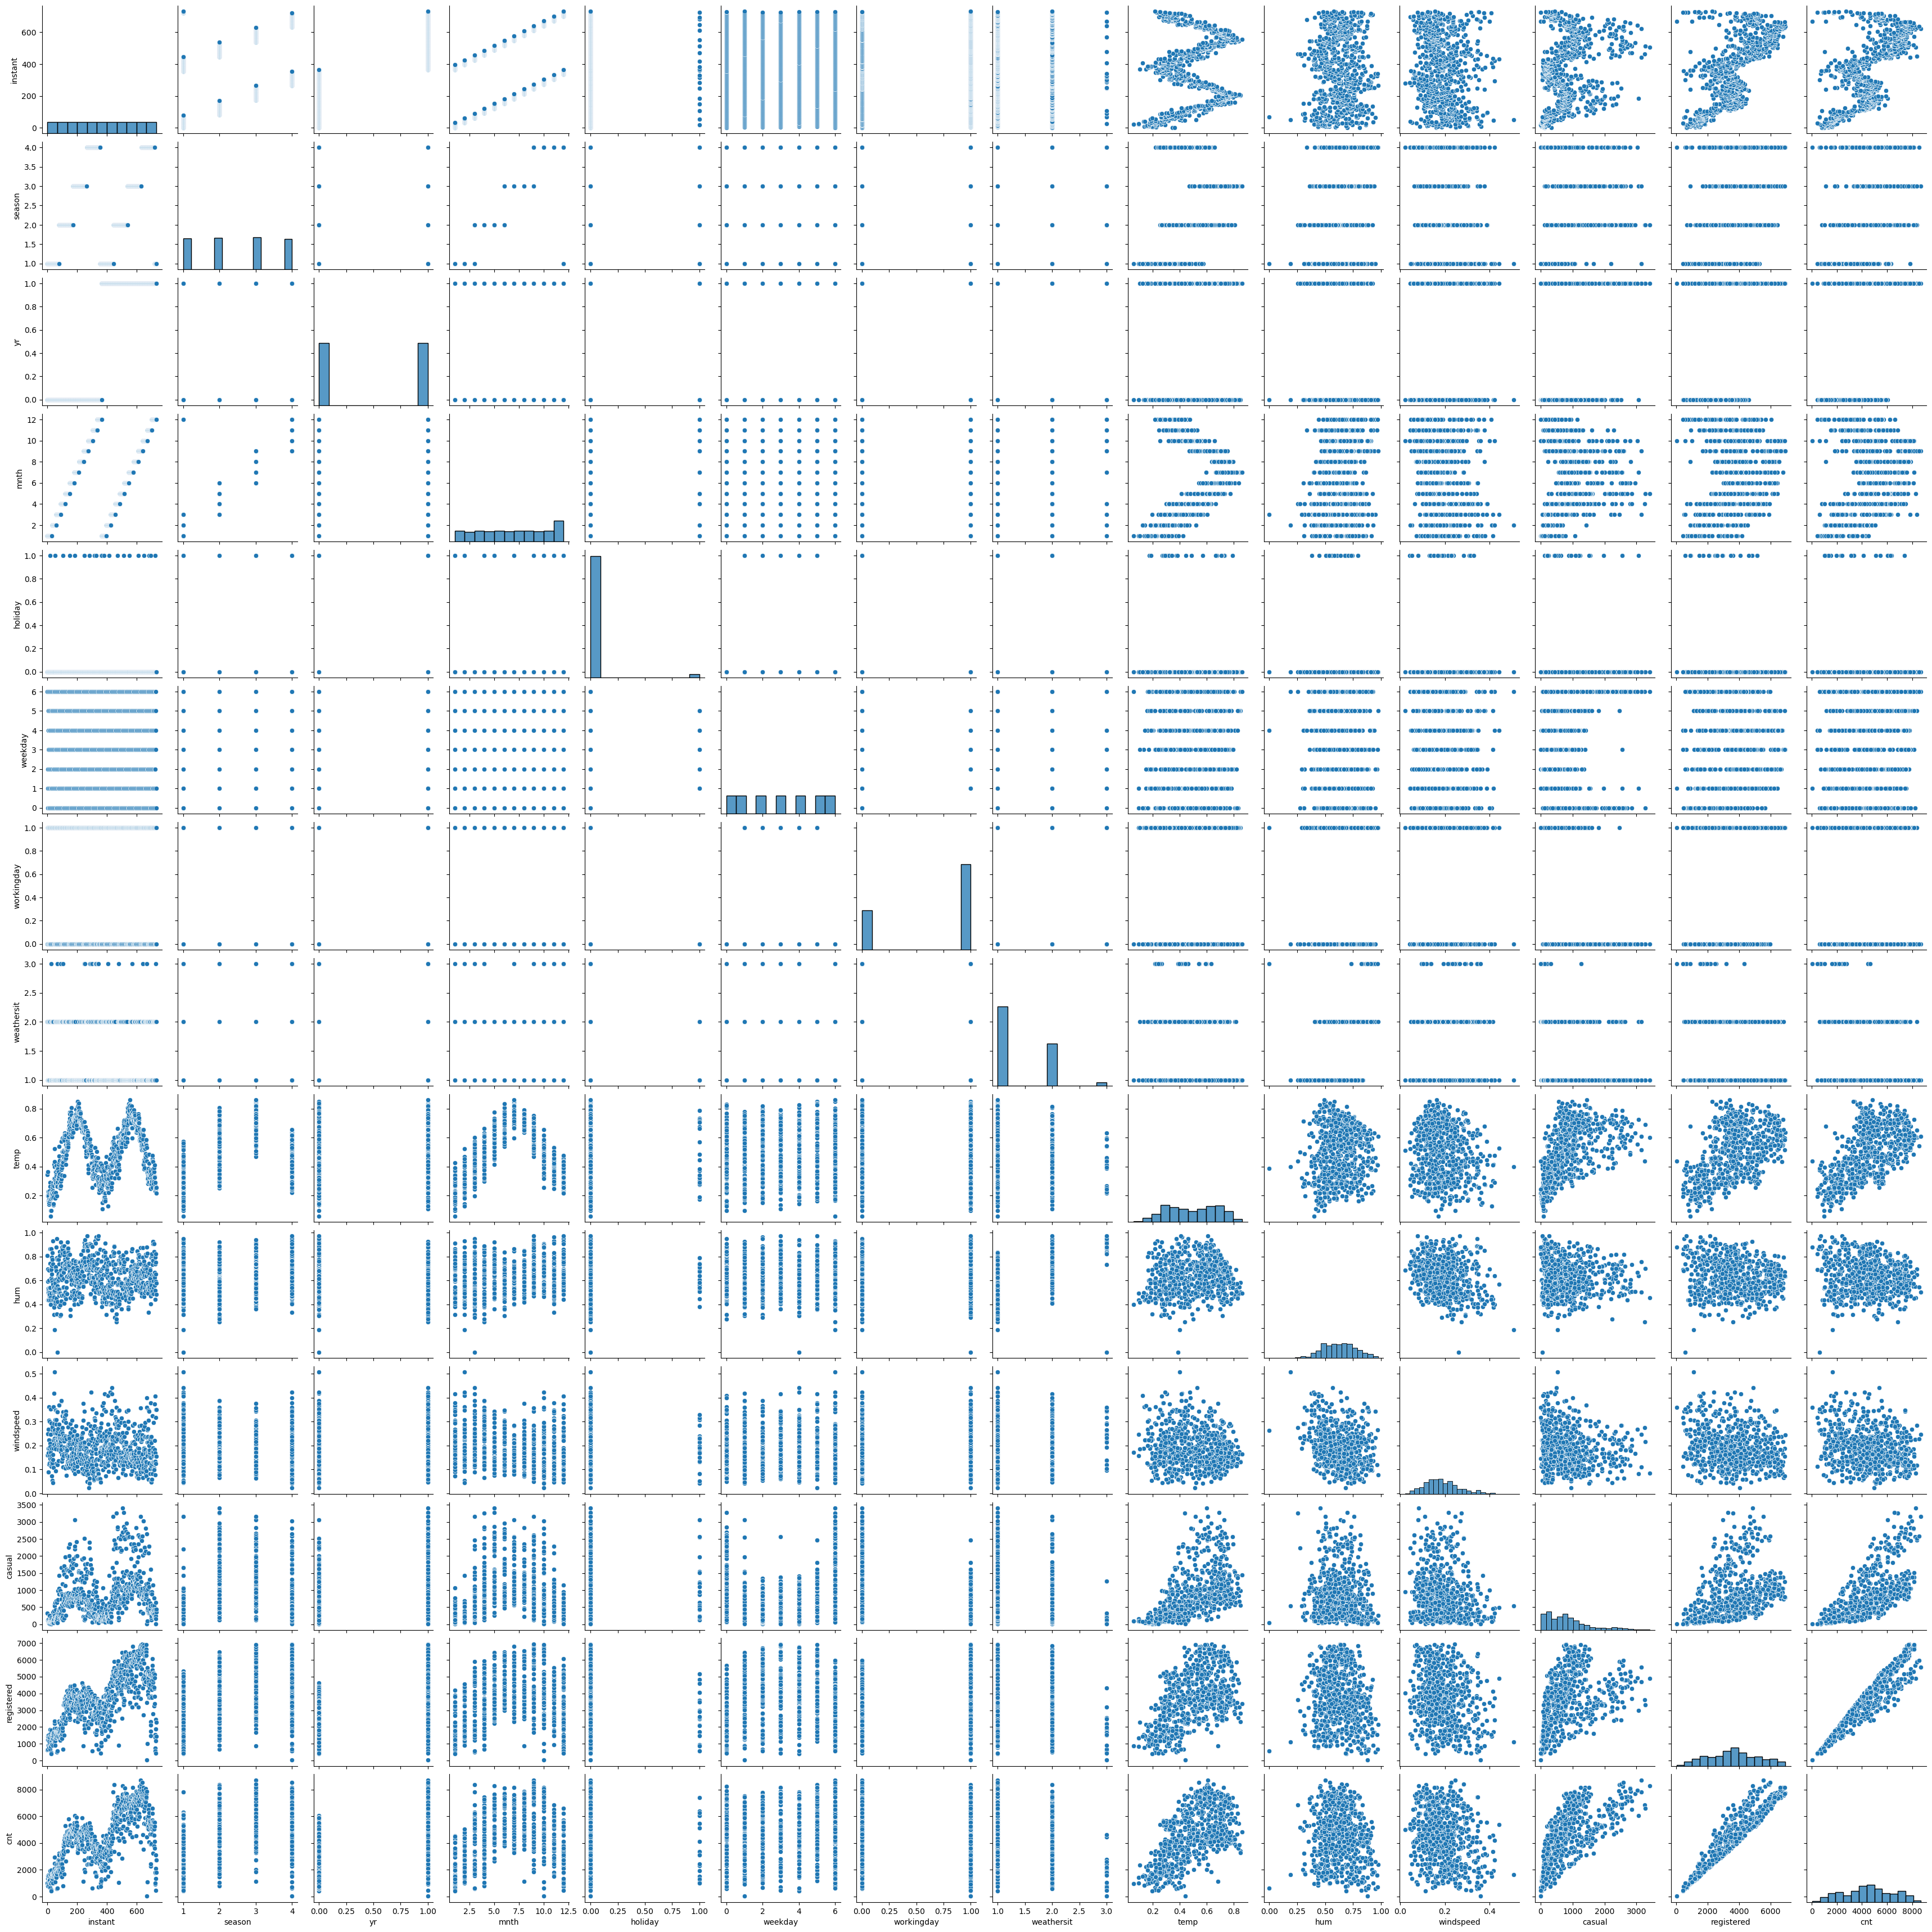

In [12]:
# plot pairplot
sns.pairplot(bike_df);

# CODING TASK #2: TRAIN/EVALUATE MULTIPLE REGRESSION MODELS USING AUTOGLUON ((METRIC: R2, PRESETS: BEST QUALITY))

In [13]:
bike_df.drop(['registered', 'cnt', 'instant', 'dteday'], inplace = True, axis = 1)

In [14]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(bike_df, test_size=0.2, random_state=0)

In [15]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual
97,2,0,4,0,5,1,2,0.335833,0.836250,0.226992,172
503,2,1,5,0,5,1,1,0.564167,0.523333,0.136817,1521
642,4,1,10,0,4,1,2,0.657500,0.722917,0.117546,891
498,2,1,5,0,0,0,1,0.612500,0.576250,0.225117,2172
303,4,0,10,0,1,1,1,0.340000,0.703333,0.106350,362
...,...,...,...,...,...,...,...,...,...,...,...
707,4,1,12,0,6,0,2,0.381667,0.911250,0.101379,1153
192,3,0,7,0,2,1,1,0.794167,0.559167,0.200254,662
629,3,1,9,0,5,1,1,0.599167,0.668750,0.154229,1250
559,3,1,7,0,5,1,2,0.731667,0.485833,0.080850,1511


In [16]:
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual
196,3,0,7,0,6,0,1,0.686667,0.585000,0.208342,2418
187,3,0,7,0,4,1,1,0.750000,0.651250,0.159200,754
14,1,0,1,0,6,0,2,0.233333,0.498750,0.157963,222
31,1,0,2,0,2,1,2,0.192174,0.829565,0.053213,47
390,1,1,1,0,4,1,2,0.341667,0.769583,0.073396,244
...,...,...,...,...,...,...,...,...,...,...,...
566,3,1,7,0,5,1,2,0.665833,0.844167,0.208967,747
688,4,1,11,0,1,1,2,0.380833,0.623333,0.235067,449
266,4,0,9,0,6,0,2,0.606667,0.862500,0.078383,1776
504,2,1,5,0,6,0,1,0.600000,0.456250,0.083975,3410


In [17]:
# Train multiple ML Regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label = "casual", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230926_194816/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20230926_194816/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Aug 1 21:03:08 UTC 2023
Disk Space Avail:   9223372036.38 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    584
Train Data Columns: 10
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1876.38 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	

In [18]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.851812       0.194008  86.306463                0.001508           0.838162            2       True         12
1          CatBoost_BAG_L1   0.844732       0.010447  22.516258                0.010447          22.516258            1       True          6
2        LightGBMXT_BAG_L1   0.842214       0.059313  13.638796                0.059313          13.638796            1       True          3
3    NeuralNetTorch_BAG_L1   0.827873       0.059246  32.507833                0.059246          32.507833            1       True         10
4          LightGBM_BAG_L1   0.824676       0.023482  13.855179                0.023482          13.855179            1       True          4
5     ExtraTreesMSE_BAG_L1   0.819772       0.162130   0.997882                0.16213

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6565100715854191,
  'KNeighborsDist_BAG_L1': 0.6093214288577027,
  'LightGBMXT_BAG_L1': 0.8422137032313775,
  'LightGBM_BAG_L1': 0.8246758946365543,
  'RandomForestMSE_BAG_L1': 0.8049868115467973,
  'CatBoost_BAG_L1': 0.8447321188316947,
  'ExtraTreesMSE_BAG_L1': 0

In [19]:
predictor.leaderboard()

                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.851812       0.194008  86.306463                0.001508           0.838162            2       True         12
1          CatBoost_BAG_L1   0.844732       0.010447  22.516258                0.010447          22.516258            1       True          6
2        LightGBMXT_BAG_L1   0.842214       0.059313  13.638796                0.059313          13.638796            1       True          3
3    NeuralNetTorch_BAG_L1   0.827873       0.059246  32.507833                0.059246          32.507833            1       True         10
4          LightGBM_BAG_L1   0.824676       0.023482  13.855179                0.023482          13.855179            1       True          4
5     ExtraTreesMSE_BAG_L1   0.819772       0.162130   0.997882                0.162130           0.997882            1       True          7
6     

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.851812,0.194008,86.306463,0.001508,0.838162,2,True,12
1,CatBoost_BAG_L1,0.844732,0.010447,22.516258,0.010447,22.516258,1,True,6
2,LightGBMXT_BAG_L1,0.842214,0.059313,13.638796,0.059313,13.638796,1,True,3
3,NeuralNetTorch_BAG_L1,0.827873,0.059246,32.507833,0.059246,32.507833,1,True,10
4,LightGBM_BAG_L1,0.824676,0.023482,13.855179,0.023482,13.855179,1,True,4
5,ExtraTreesMSE_BAG_L1,0.819772,0.162130,0.997882,0.162130,0.997882,1,True,7
6,LightGBMLarge_BAG_L1,0.816326,0.372465,26.957877,0.372465,26.957877,1,True,11
7,RandomForestMSE_BAG_L1,0.804987,0.393347,2.144131,0.393347,2.144131,1,True,5
8,XGBoost_BAG_L1,0.804843,0.056566,16.530132,0.056566,16.530132,1,True,9
9,NeuralNetFastAI_BAG_L1,0.770147,0.065179,24.846095,0.065179,24.846095,1,True,8


In [20]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.851812       0.194008  86.306463                0.001508           0.838162            2       True         12
1          CatBoost_BAG_L1   0.844732       0.010447  22.516258                0.010447          22.516258            1       True          6
2        LightGBMXT_BAG_L1   0.842214       0.059313  13.638796                0.059313          13.638796            1       True          3
3    NeuralNetTorch_BAG_L1   0.827873       0.059246  32.507833                0.059246          32.507833            1       True         10
4          LightGBM_BAG_L1   0.824676       0.023482  13.855179                0.023482          13.855179            1       True          4
5     ExtraTreesMSE_BAG_L1   0.819772       0.162130   0.997882                0.162130           0.997882            1       True          7
6     

In [21]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.8796550707727521
Evaluations on test data:
{
    "r2": 0.8796550707727521,
    "root_mean_squared_error": -252.17163324755538,
    "mean_squared_error": -63590.53261473956,
    "mean_absolute_error": -166.25715857784763,
    "pearsonr": 0.9406402558031455,
    "median_absolute_error": -106.05657958984375
}


{'r2': 0.8796550707727521,
 'root_mean_squared_error': -252.17163324755538,
 'mean_squared_error': -63590.53261473956,
 'mean_absolute_error': -166.25715857784763,
 'pearsonr': 0.9406402558031455,
 'median_absolute_error': -106.05657958984375}

In [22]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:])

Predictions:   [2042.4791259765625, 775.220703125, 200.2213592529297, 111.77013397216797, 234.55316162109375, 149.71353149414062, 339.2393493652344, 604.468505859375, 2066.71337890625, 135.87045288085938, 55.940853118896484, 151.63436889648438, 179.635986328125, 814.4840698242188, 807.74853515625, 705.2874755859375, 1075.187255859375, 1758.1451416015625, 142.6765594482422, 349.33209228515625, 1212.683837890625, 530.1615600585938, 391.44305419921875, 1845.10205078125, 223.29135131835938, 2262.470703125, 740.6055297851562, 829.7161865234375, 2214.53125, 2618.31103515625, 158.73587036132812, 785.5283203125, 417.3998107910156, 2080.04296875, 369.7568054199219, 637.6505126953125, 968.0802001953125, 2021.940673828125, 338.53155517578125, 208.56051635742188, 2401.79736328125, 570.6097412109375, 674.7550048828125, 367.26422119140625, 1051.3604736328125, 994.8499755859375, 252.99395751953125, 1513.815673828125, 554.901123046875, 583.8853149414062, 2081.2529296875, 1055.847900390625, 651.1452636

In [23]:
y_test = X_test['casual']
y_test

196    2418
187     754
14      222
31       47
390     244
       ... 
566     747
688     449
266    1776
504    3410
239    1415
Name: casual, Length: 147, dtype: int64

In [24]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


Text(0, 0.5, 'True Values')

In [25]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 252.172 
MSE = 63590.53261473956 
MAE = 166.25715857784763 
R2 = 0.8796550707727521 
Adjusted R2 = 0.8698491876505319


# CODING TASK #3: TRAIN/EVALUATE REGRESSION MODELS USING AUTOGLUON (METRIC: RMSE, PRESETS: OPTIMIZED FOR DEPLOYMENT)

In [26]:
predictor = TabularPredictor(label="casual", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

No path specified. Models will be saved in: "AutogluonModels/ag-20230926_195136/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20230926_195136/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Aug 1 21:03:08 UTC 2023
Disk Space Avail:   9223372036.38 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    584
Train Data Columns: 10
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1571.27 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 fea

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -211.338999       0.038204  7.708499                0.000804           0.534555            2       True          7
1             CatBoost -234.305727       0.002263  1.091545                0.002263           1.091545            1       True          4
2       NeuralNetTorch -239.624229       0.010674  5.143677                0.010674           5.143677            1       True          6
3           LightGBMXT -253.193580       0.003688  0.376990                0.003688           0.376990            1       True          3
4              XGBoost -259.843126       0.004099  0.497014                0.004099           0.497014            1       True          5
5       KNeighborsUnif -297.234364       0.004007  0.053409                0.004007           0.053409        

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-211.338999,0.038204,7.708499,0.000804,0.534555,2,True,7
1,CatBoost,-234.305727,0.002263,1.091545,0.002263,1.091545,1,True,4
2,NeuralNetTorch,-239.624229,0.010674,5.143677,0.010674,5.143677,1,True,6
3,LightGBMXT,-253.193580,0.003688,0.376990,0.003688,0.376990,1,True,3
4,XGBoost,-259.843126,0.004099,0.497014,0.004099,0.497014,1,True,5
5,KNeighborsUnif,-297.234364,0.004007,0.053409,0.004007,0.053409,1,True,1
6,KNeighborsDist,-348.752273,0.012669,0.011309,0.012669,0.011309,1,True,2


In [27]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -211.338999       0.038204  7.708499                0.000804           0.534555            2       True          7
1             CatBoost -234.305727       0.002263  1.091545                0.002263           1.091545            1       True          4
2       NeuralNetTorch -239.624229       0.010674  5.143677                0.010674           5.143677            1       True          6
3           LightGBMXT -253.193580       0.003688  0.376990                0.003688           0.376990            1       True          3
4              XGBoost -259.843126       0.004099  0.497014                0.004099           0.497014            1       True          5
5       KNeighborsUnif -297.234364       0.004007  0.053409                0.004007           0.053409            1       True          1
6       KNeighborsDist -348.752273

In [28]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -211.338999       0.038204  7.708499                0.000804           0.534555            2       True          7
1             CatBoost -234.305727       0.002263  1.091545                0.002263           1.091545            1       True          4
2       NeuralNetTorch -239.624229       0.010674  5.143677                0.010674           5.143677            1       True          6
3           LightGBMXT -253.193580       0.003688  0.376990                0.003688           0.376990            1       True          3
4              XGBoost -259.843126       0.004099  0.497014                0.004099           0.497014            1       True          5
5       KNeighborsUnif -297.234364       0.004007  0.053409                0.004007           0.053409        

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'CatBoost': 'CatBoostModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -297.23436379824767,
  'KNeighborsDist': -348.7522731054578,
  'LightGBMXT': -253.1935802154878,
  'CatBoost': -234.30572747362487,
  'XGBoost': -259.84312649037014,
  'NeuralNetTorch': -239.62422904603724,
  'WeightedEnsemble_L2': -211.33899917288494},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels/ag-20230926_195136/models/KNeighborsUnif/',
  'KNeighborsDist': 'AutogluonModels/ag-20230926_195136/models/KNeighborsDist/',
  'LightGBMXT': 'AutogluonModels/ag-20230926_195136/models/LightGBMXT/',
  'CatBoost': 'AutogluonModels/ag-20230926_195136/models/CatBoost/',
  'XGBoost': 'AutogluonModels/ag-20230926_195136/models/XGBoost/',
  'NeuralNetT

In [29]:
predictor.leaderboard()

                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -211.338999       0.038204  7.708499                0.000804           0.534555            2       True          7
1             CatBoost -234.305727       0.002263  1.091545                0.002263           1.091545            1       True          4
2       NeuralNetTorch -239.624229       0.010674  5.143677                0.010674           5.143677            1       True          6
3           LightGBMXT -253.193580       0.003688  0.376990                0.003688           0.376990            1       True          3
4              XGBoost -259.843126       0.004099  0.497014                0.004099           0.497014            1       True          5
5       KNeighborsUnif -297.234364       0.004007  0.053409                0.004007           0.053409            1       True          1
6       KNeighborsDist -348.752273

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-211.338999,0.038204,7.708499,0.000804,0.534555,2,True,7
1,CatBoost,-234.305727,0.002263,1.091545,0.002263,1.091545,1,True,4
2,NeuralNetTorch,-239.624229,0.010674,5.143677,0.010674,5.143677,1,True,6
3,LightGBMXT,-253.193580,0.003688,0.376990,0.003688,0.376990,1,True,3
4,XGBoost,-259.843126,0.004099,0.497014,0.004099,0.497014,1,True,5
5,KNeighborsUnif,-297.234364,0.004007,0.053409,0.004007,0.053409,1,True,1
6,KNeighborsDist,-348.752273,0.012669,0.011309,0.012669,0.011309,1,True,2


In [30]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -211.338999       0.038204  7.708499                0.000804           0.534555            2       True          7
1             CatBoost -234.305727       0.002263  1.091545                0.002263           1.091545            1       True          4
2       NeuralNetTorch -239.624229       0.010674  5.143677                0.010674           5.143677            1       True          6
3           LightGBMXT -253.193580       0.003688  0.376990                0.003688           0.376990            1       True          3
4              XGBoost -259.843126       0.004099  0.497014                0.004099           0.497014            1       True          5
5       KNeighborsUnif -297.234364       0.004007  0.053409                0.004007           0.053409            1       True          1
6       KNeighborsDist -348.752273

In [31]:
predictor.evaluate(X_test)

Evaluation: root_mean_squared_error on test data: -270.2286632659106
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -270.2286632659106,
    "mean_squared_error": -73023.53045048089,
    "mean_absolute_error": -184.81308606206153,
    "r2": 0.8618031451752624,
    "pearsonr": 0.93429459397735,
    "median_absolute_error": -137.5735626220703
}


{'root_mean_squared_error': -270.2286632659106,
 'mean_squared_error': -73023.53045048089,
 'mean_absolute_error': -184.81308606206153,
 'r2': 0.8618031451752624,
 'pearsonr': 0.93429459397735,
 'median_absolute_error': -137.5735626220703}

In [32]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:])

Predictions:   [1980.47265625, 858.8409423828125, 246.0902099609375, 88.82288360595703, 215.8482666015625, 139.6886444091797, 449.4756164550781, 547.1689453125, 2095.998291015625, 119.27064514160156, 81.86933135986328, 195.91204833984375, 213.66075134277344, 834.542724609375, 885.4384765625, 742.1980590820312, 1069.0321044921875, 1684.3411865234375, 155.5009765625, 350.7012634277344, 1126.8468017578125, 513.200439453125, 401.06494140625, 1859.4423828125, 230.87474060058594, 2179.38330078125, 766.3555908203125, 849.6768798828125, 2211.535888671875, 2557.5400390625, 180.00978088378906, 842.9644165039062, 435.4471435546875, 2078.82861328125, 405.6177673339844, 630.0546264648438, 1004.5718383789062, 1988.386474609375, 404.0938720703125, 233.5735626220703, 2269.552734375, 502.6903991699219, 743.7656860351562, 299.0107116699219, 1026.2799072265625, 944.8218994140625, 229.91835021972656, 1510.7222900390625, 599.1365966796875, 689.5018310546875, 1883.4639892578125, 966.5836181640625, 624.71240

In [33]:
y_test = X_test['casual']
y_test

196    2418
187     754
14      222
31       47
390     244
       ... 
566     747
688     449
266    1776
504    3410
239    1415
Name: casual, Length: 147, dtype: int64

In [34]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


Text(0, 0.5, 'True Values')

In [35]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 270.229 
MSE = 73023.53045048089 
MAE = 184.81308606206153 
R2 = 0.8618031451752624 
Adjusted R2 = 0.8505426607080615


# EXCELLENT JOB